In [1]:
#This was my first attempt in trying to create a model/work on a data set. I used it as a chance to learn and implement Pandas and work on my data science knowledge in general


#This program allows one to forecast the future deaths, future cases, and future new cases of a series of Covid Data Between January 2020 and July 2020 for every country in the world. 
#I supplemented the data with external data not in attempt to predict the next covid wave, but to assess the effects of the supplementary data on an active wave, although I fell short of this and just created a simple regression in the end.
#I explain my reasoning for my steps throughout, and also explain the reasoning for the direction I took in the project
#Although this program describes the process, it does not include the previous attempts at getting each part to work, which I have also attached.

#!!!!!!!!I perform most of my analysis on the country of Japan, although the program works for all countries, so I recommend following the program through in its current state, then changing the country after reading through to the end!!!!!!!!!!

#I decided that trying to automate the process across the countries as much as possible would be a good idea:
#By grouping/summing over rows with the same Country AND the same Date, the cities are summed to get a total for the country without summing over the same dates in different countries or different dates for the same country.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib widget
%matplotlib inline
#Please insert the file path of the 'Prepared Covid Data'
prepared_data = pd.read_csv(r'C:\Users\Alex\OneDrive\Documents\Prepared Covid Data.csv')
grouped = prepared_data.groupby(['Date', 'Country']).sum()
grouped.columns = ['Cases', 'Deaths']
grouped = grouped.reset_index()
grouped


,Date,Country,Cases,Deaths
0,01/22/2020,Hong Kong,0,0
1,01/22/2020,Japan,2,0
2,01/22/2020,Macau,1,0
3,01/22/2020,Mainland China,547,17
4,01/22/2020,South Korea,1,0
...,...,...,...,...
34076,08/29/2020,West Bank and Gaza,21668,147
34077,08/29/2020,Western Sahara,10,1
34078,08/29/2020,Yemen,1946,563
34079,08/29/2020,Zambia,11902,284


In [2]:
Database_of = grouped.sort_values(by=['Country','Cases'])
Database_of
#Ordering by Country i.e., alphabetically and by cases (since cases never decrease, given they are total.)

,Date,Country,Cases,Deaths
1030,02/28/2020,Azerbaijan,1,0
1972,03/10/2020,"('St. Martin',)",2,0
848,02/24/2020,Afghanistan,1,0
886,02/25/2020,Afghanistan,1,0
928,02/26/2020,Afghanistan,1,0
...,...,...,...,...
2594,03/14/2020,occupied Palestinian territory,0,0
2743,03/15/2020,occupied Palestinian territory,0,0
2901,03/16/2020,occupied Palestinian territory,0,0
3062,03/17/2020,occupied Palestinian territory,0,0


In [3]:
for Country in Database_of['Country'].unique():
    locals()['Database_of_' + Country] = Database_of[(Database_of.Country == Country)]
    
# Dataframes now accessible by 'final_' + Country
# First must type the database to store it as below
Database_of_Japan

,Date,Country,Cases,Deaths
12,01/23/2020,Japan,1,0
1,01/22/2020,Japan,2,0
26,01/24/2020,Japan,2,0
38,01/25/2020,Japan,2,0
53,01/26/2020,Japan,4,0
...,...,...,...,...
33218,08/25/2020,Japan,63888,1219
33408,08/26/2020,Japan,64779,1230
33598,08/27/2020,Japan,65653,1241
33788,08/28/2020,Japan,66499,1251


In [4]:
#Now adding a column of 'New Cases (for later)'
Database_of_Japan['New Cases'] = Database_of_Japan['Cases'] - Database_of_Japan['Cases'].shift(1)
#And replacing NaN's with 0's for arrays 
Database_of_Japan

Database_of_Japan['New Cases'] = Database_of_Japan['New Cases'].replace(np.nan, 0)
Database_of_Japan

C:\Users\Alex\AppData\Local\Temp/ipykernel_16992/33260011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Database_of_Japan['New Cases'] = Database_of_Japan['Cases'] - Database_of_Japan['Cases'].shift(1)
C:\Users\Alex\AppData\Local\Temp/ipykernel_16992/33260011.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Database_of_Japan['New Cases'] = Database_of_Japan['New Cases'].replace(np.nan, 0)


,Date,Country,Cases,Deaths,New Cases
12,01/23/2020,Japan,1,0,0.0
1,01/22/2020,Japan,2,0,1.0
26,01/24/2020,Japan,2,0,0.0
38,01/25/2020,Japan,2,0,0.0
53,01/26/2020,Japan,4,0,2.0
...,...,...,...,...,...
33218,08/25/2020,Japan,63888,1219,730.0
33408,08/26/2020,Japan,64779,1230,891.0
33598,08/27/2020,Japan,65653,1241,874.0
33788,08/28/2020,Japan,66499,1251,846.0


Where x is Deaths: Cases = 0.06917 * x + -0.00000 * x^2 + 0.00000 * x^3+ -49.46025


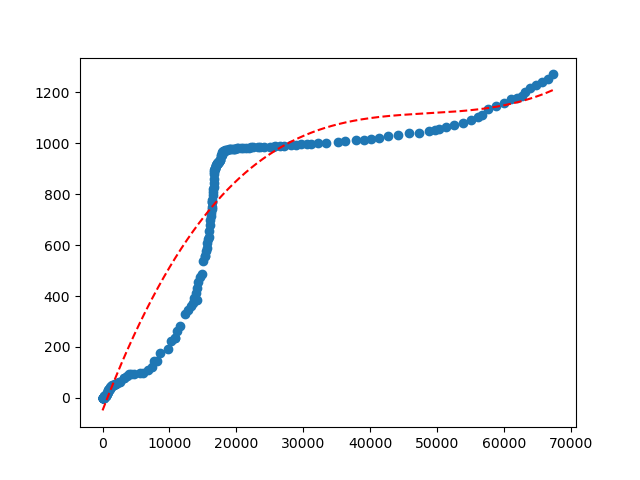

In [5]:
#The first plot of data.
#Higher degree polynomials were not working with some Country databases and I wasn't entirely sure why. I thought perhaps this was due to x dominating as the Polynomial degree became larger for large case numbers, but just speculation.

%matplotlib widget
from matplotlib import pyplot
from numpy import arange
from scipy.optimize import curve_fit
def func2(x,q,w,n,h):
    return (q * x) + (w * x**2) + (n * x**3) + h
#https://machinelearningmastery.com/curve-fitting-with-python/
x, y = Database_of_Japan['Cases'], Database_of_Japan['Deaths']
popt, _ = curve_fit(func2,x,y)
q, w, n, h = popt
print('Where x is Deaths: Cases = %.5f * x + %.5f * x^2 + %.5f * x^3+ %.5f' % (q, w, n, h))
pyplot.scatter(x, y)
x_line = np.arange(min(x), max(x), 0.01)
y_line = func2(x_line, q, w, n, h)
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()
function = func2(x,w,n,h,q)
#popt
#print(popt,_)


In [6]:
#Polynomial order 3 working the best so far.
#The issue with this model, is the regression is trying to fit to external factors. It cannot be assumed that the external factors are cyclical or predictable with time.
#It is therefore somewhat obvious that without considering external factors, the regression should only be applied to the latest data.
#The cut-off for this data is easy to judge qualitatively on a case-by-case basis, but difficult as an automated process. Essentially, the polynomial regression should be fitted past the last clear point of external influence.
#For example, for the dataset of Japan, as can be seen by loading and inputting the correct database above, the point of last external unpredicatble influence (e.g. vaccination rollout) occurs at around 17000 cases.

#----------------Now analysing a case more closely to further examine the approach----------------

#One could now naively plot a regression for cases over time, but given the many ghost factors of influence of such a secondary model, it wouldn't utimately predict the number of deaths accurately (since the cases could very easily not be accurate given a change in one of the not considered factors of influence). 
#So ideally, you want a model that can include the factor of time, but also express potential change in a seperate variable as means for more meaningful prediction
#The seperate variable I will attempt to include is the presence of lockdowns, or more specifically, the continuous 'Oxford Covid-19 government response stringency index'
#Arguably something similar could have been done for the death as a function of case model, such as including a factor like 'percentage vaccinated', but fo the sake of this project I will stay with the Polynomial model for now


#So now aiming to predict number of future cases using the stringency index. The issue of that is that given the strincengy will rise and fall, the only correlation it may have will not be with the total number of cases, but the rate of increase or the derivative at each point.
#Even better so - and probably following a near identical distribution (to the derivative) distribution, the leniancy index will be better correlated with the new cases, which can simply be found daily by subtracting the prior cases the day before. 
#By plotting the stringency index against new cases on Excel, it can be seen in a number of examples that new cases and strincency index are positively correlated.
#It is thus dangerous to determine new cases as a function of the stringency index, since the stringency index is the responce to new-cases numbers, rather than the other way round
#An example of the stringency index and new cases as a function of time is given below for Afghanistan.

#Please insert the file path of 'Afghanistan Data 1

A1 = pd.read_csv(r'C:\Users\Alex\OneDrive\Documents\Afghanistan Data 1.csv')
A1

,Day,New Cases,SI
0,1,1,8.33
1,2,0,8.33
2,3,0,8.33
3,4,0,8.33
4,5,0,8.33
...,...,...,...
183,184,16,48.15
184,185,43,21.30
185,186,16,21.30
186,187,11,21.30


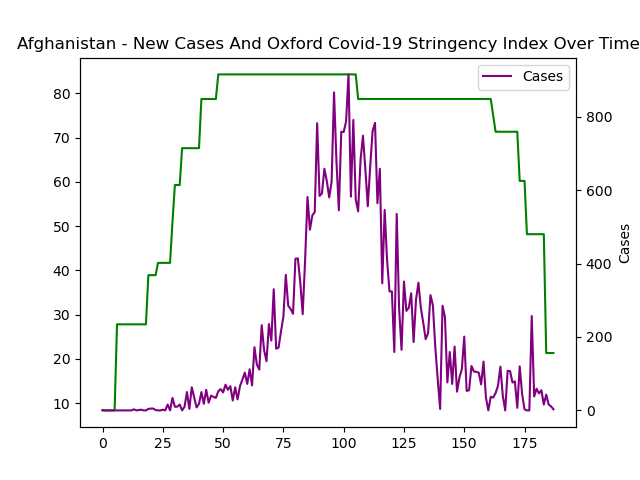

In [7]:
SI = A1['SI']
New_Cases = A1['New Cases']
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(SI, color='green')
ax_right.plot(New_Cases, color='purple')

plt.title('Afghanistan - New Cases And Oxford Covid-19 Stringency Index Over Time')

plt.xlabel('SI')
plt.ylabel('Cases')

plt.gca().legend(('Cases','SI'))


In [8]:
#Please insert the file path of 'Afghanistan Data 2'

A2 = pd.read_csv(r'C:\Users\Alex\OneDrive\Documents\Afghanistan Data 2.csv')
A2

,Day,Active Cases,SI
0,1,1,0.0
1,2,1,0.0
2,3,1,0.0
3,4,1,0.0
4,5,1,0.0
...,...,...,...
183,184,639,78.7
184,185,562,78.7
185,186,533,78.7
186,187,541,78.7


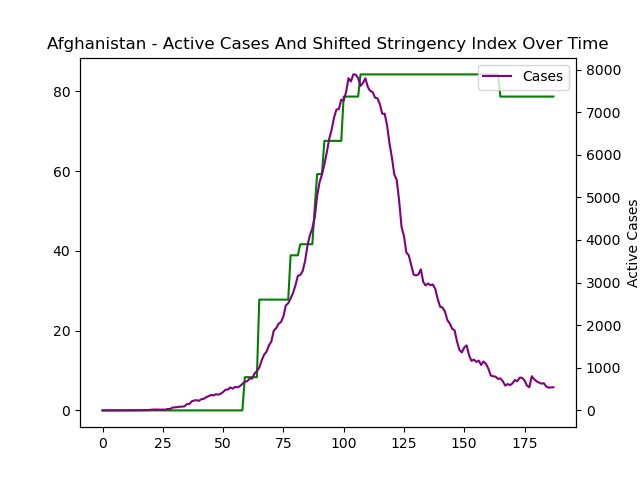

In [9]:
#It is easy to see that the presence of a highly stringent government protocol may have been a direct cause of the fall in new cases, such as the upper green lines above.
#However, there is clearly a time-lag between the exposure to the stringent rules and the signs of viral retreat in the population
#Furthermore it is difficult to ascertain the degree to which the result of new-cases retreating is due to the most recent degree of stringency or those preceeding it.
#For example, it is difficult to say how much the decline after the peak in cases, in the above example, is due to the uppermost green line (call it A) , or to those before it. This could be seen potentially, with varying degrees of the strincengy responce prior to the peak in repeated events in future peaks (i.e., elimination of the factors of influence) assuming other factors e.g. vaccinations were able to be controlled...but for now it is difficult
#There could be an even larger time lag for current active cases, which could be determined on a particular day by the total cases minus the cases before the duration equivalent to the duration that a test would display a positive result after initial exposure (weighted on the assumption that most people are getting tested due to displaying symptoms - since people can still test positive for weeks after exposure (https://www.gavi.org/vaccineswork/how-long-after-i-get-covid-19-will-i-test-negative))
#Rather the to plot active cases you would have to make the assumption that the majority of new positive tests over some time period (e.g. past 10 days) indicate people testing (due to their symptoms) in the initial infective stage of the virus. This allows you just to sum the new cases over the past 10 days or use the method stated above.
#Assuming the future measures would be implemented in the same way as before, i.e., for the same duration and in the same order, and assuming the accuracy of a particular time delay between the government measures, one could 'shift forwards' the stringency index and examine the relationship between the index and active cases, which are more easily translated into deaths than new cases - which could be found by integration over a certain period.
#An example of this shifted plot (50 days shifted)


SI = A2['SI']
Active_Cases = A2['Active Cases ']
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.plot(SI, color='green')
ax_right.plot(Active_Cases, color='purple')

plt.title('Afghanistan - Active Cases And Shifted Stringency Index Over Time')

plt.xlabel('SI')
plt.ylabel('Active Cases')

plt.gca().legend(('Cases','SI'))

In [10]:
# The relationship is clearer to see, but one cannot establish much causality since it is assumed that the long measure is the main cause of the fall in cases, which itself is not changing and thus difficult to describe any relationship through.
# If one shifted the stringency further forward in time, there would then be a relationship, but such a shift would be hard to justify
# Another method that could be used is comparison of similar countries, with similar distributions of cases (prior to measures being introduced) but different measures
# For example, similar countries (or perhaps even cities within a country) country A and country B have similar rising cases. Country A introduces measures whereas country B does not, the difference in the case numbers between the two countries given the different measures could allow for different forecasts based on an initial trend in cases
#However, given the scope of the project and the amount of assumptions and analysis that would be required, for now I continue with simple regression in the number of cases based on the near past, and assume that no change in the other factors of influence occur.

#Now to develop code to only include X of the final rows from each country database, i.e., after the last point of unseen influence


In [11]:

ThreeD_Database_of_Japan = Database_of_Japan.reset_index(level=0, inplace=True)
Database_of_Japan

Database_of_Japan['index1'] = Database_of_Japan.index

#Adding column of the index to act as days 
#Adding a 3D plot in order to see how many days in the regression should start (after the last point of an obvious unseen factor of influence e.g. new covid drug - where the graph changes unpredictably), we plot a 3D model. 


C:\Users\Alex\AppData\Local\Temp/ipykernel_16992/3369926084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Database_of_Japan['index1'] = Database_of_Japan.index


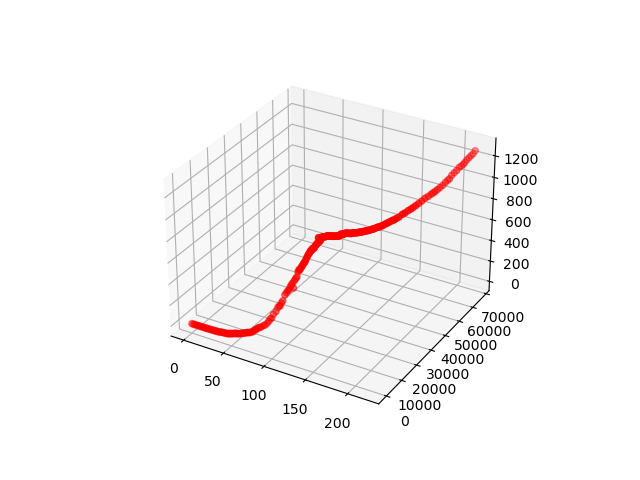

In [12]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = Database_of_Japan['index1'].values
y = Database_of_Japan['Cases'].values
z = Database_of_Japan['Deaths'].values

ax.scatter(x, y, z, c='r', marker='o')

plt.show()

In [ ]:
N = int(input('How many days in was the final unseen factor of influence?'))
Database_of_Japan = Database_of_Japan.tail(Database_of_Japan.shape[0] -N)

In [ ]:
Database_of_Japan

 Where x is Cases: Deaths = 0.0464788821 * x + -0.0000011930 * x^2 + 0.000000000010346 * x^3+ 416.3382343154


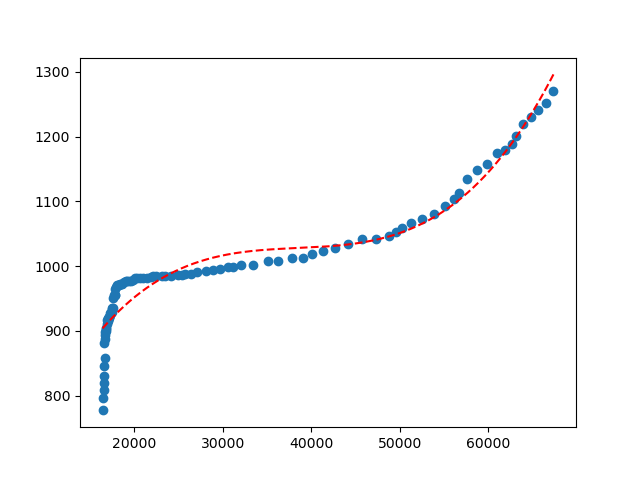

In [48]:
#Now for the regression:
%matplotlib widget
from matplotlib import pyplot
from numpy import arange
from scipy.optimize import curve_fit
def func2(x,q,w,n,h):
    return (q * x) + (w * x**2) + (n * x**3) + h
#https://machinelearningmastery.com/curve-fitting-with-python/
x, y = Database_of_Japan['Cases'], Database_of_Japan['Deaths']
popt, _ = curve_fit(func2,x,y)
q, w, n, h = popt
#Amount of figures may need to be adjusted depending on the example
print(' Where x is Cases: Deaths = %.10f * x + %.10f * x^2 + %.15f * x^3+ %.10f' % (q, w, n, h))
pyplot.scatter(x, y)
x_line = np.arange(min(x), max(x), 0.01)
y_line = func2(x_line, q, w, n, h)
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()
function = func2(x,w,n,h,q)
#popt
#print(popt,_)


Where x is Days: Cases = -21.11392 * x + -6.26531 * x^2 + 0.03013 * x^3+ 59044.89630


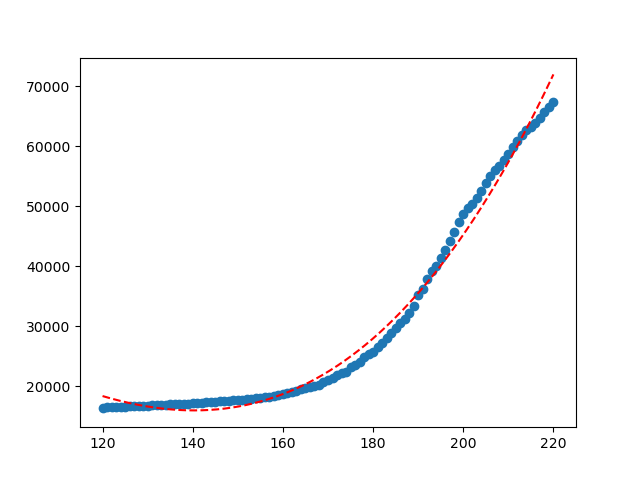

In [49]:

#Now to forcast cases over time.
%matplotlib widget
from matplotlib import pyplot
from numpy import arange
from scipy.optimize import curve_fit
def func2(x,q,w,n,h):
    return (q * x) + (w * x**2) + (n * x**3) + h
#https://machinelearningmastery.com/curve-fitting-with-python/
x, y = Database_of_Japan['index1'], Database_of_Japan['Cases']
popt, _ = curve_fit(func2,x,y)
q, w, n, h = popt
print('Where x is Days: Cases = %.5f * x + %.5f * x^2 + %.5f * x^3+ %.5f' % (q, w, n, h))
pyplot.scatter(x, y)
x_line = np.arange(min(x), max(x), 0.01)
y_line = func2(x_line, q, w, n, h)
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()
function = func2(x,w,n,h,q)
#popt
#print(popt,_)


Where x is days: New Cases = -793.50849 * x + 4.82114 * x^2 + -0.00943 * x^3+ 42365.69727


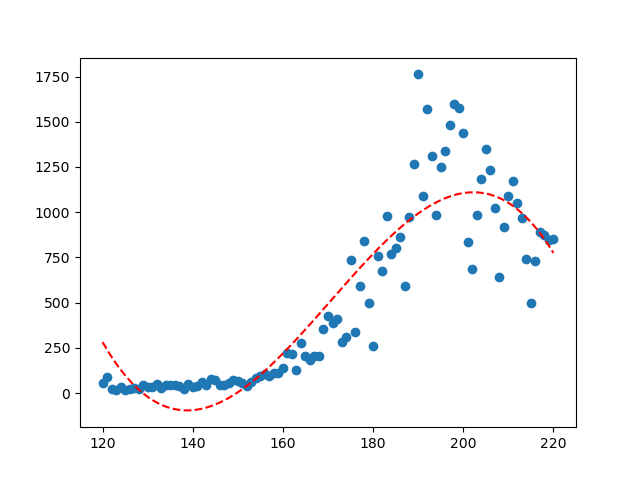

In [50]:
#In order to calculate the future total death tally, one would select a future day e.g. in the case of Japan, 280, then find the cases using the Cases equation above, then input the case number into the equation for Deaths as a function of Cases to find the total predicted deaths at that point.
#It may be interesting to plot the regression of new cases
%matplotlib widget
from matplotlib import pyplot
from numpy import arange
from scipy.optimize import curve_fit
def func2(x,q,w,n,h):
    return (q * x) + (w * x**2) + (n * x**3) + h
#https://machinelearningmastery.com/curve-fitting-with-python/
x, y = Database_of_Japan['index1'], Database_of_Japan['New Cases']
popt, _ = curve_fit(func2,x,y)
q, w, n, h = popt
print('Where x is days: New Cases = %.5f * x + %.5f * x^2 + %.5f * x^3+ %.5f' % (q, w, n, h))
pyplot.scatter(x, y)
x_line = np.arange(min(x), max(x), 0.01)
y_line = func2(x_line, q, w, n, h)
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()
function = func2(x,w,n,h,q)
#popt
#print(popt,_)


In [51]:
#Now to test the model:
#Let's test the model 40 days into the future (Days = 220 + 50 = 270)
#Japan
#Where x is Cases: Deaths = 0.0153006509 * x + -0.0000004403 * x^2 + 0.000000000004690 * x^3+ 808.1143476269
#Where x is days, Cases = -22815.35295 * x + 117.74496 * x^2 + -0.19301 * x^3+ 1444351.80232
#Where x is days: New Cases = -2045.72772 * x + 11.70747 * x^2 + -0.02194 * x^3+ 117570.38962

#Cases at day 270 = -22815.35295 * 270 + 117.74496 * 270^2 + -0.19301 * 270^3+ 1444351.80232 = 69363 Total Cases
#Using this number of Total Cases to find the Total Deaths at that point:
#Deaths at day 270 = 0.0153006509 * 69363 + -0.0000004403 * 69363^2 + 0.000000000004690 * 69363^3+ 808.1143476269 = 1317.5114
#New Cases at day 270= -2045.72772 * 270 + 11.70747 * 270^2 + -0.02194 * 270^3+ 117570.38962 = -14864.6

#Unsurprisingly, given the lack of data to provide evidence of a cyclic nature which could then be introduced mathematically via a sine function, the New Cases gives a negative number. 
#This is likely to be the case for many countries across this 'wave' period.
#Furthermore, the model would be better at predicting the New Cases closer to the end of the data, but still wouldn't capture the likely 'levelling off' that would be seen in reality.
#It is fair to say that data over a longer timeframe would be required to better predict new cases for many countries.

#Looking now at the total Deaths and Cases.
#First, day 270 equates to the 18th of October 2020
#The Cases at that time were 92,268 (17th) https://www.worldometers.info/coronavirus/country/japan/
#This is considerably more than predicted by the model. The error of the model wrt the predicted cases is 33.02%.
#And unsurprisingly leads to an incorrect predicted number of deaths:
#The actual deaths were 1661, as opposed to the models estimate of 1317
#The resultant error is 26.12% wrt the models prediction

#The issues with the model are clear and can again be understood in the context of the New Cases. For a time estimate of 50 days into the future, there is enough time for another peak in New Cases, or rather a 'wave' to arise.
#Another bump in new cases (which was observed in Japan at the time) manifests in the total cases as an increase in the slope of total cases. 
#Clearly this again represents the need for more data to give context to the cyclic nature of the cases number
#However, one can still use the model to make predictions in the near future.
#The span of the models usefullness roughly translates to some fraction of the time period of a particular 'wave'. For example in the Japan case, given the New Cases plot, one would only predict a few days of usefulness.
#However, for another country, the wave of cases may be behind (for example, the equivalent of Japan on day 210), and such a model would be able to predict further in the future, given the lesser importance of the cyclic nature and the 'levelling off' of cases at the time.
